In [ ]:
import os
import cv2
import matplotlib.pyplot as pyplot
import numpy as np
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

/home/li/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


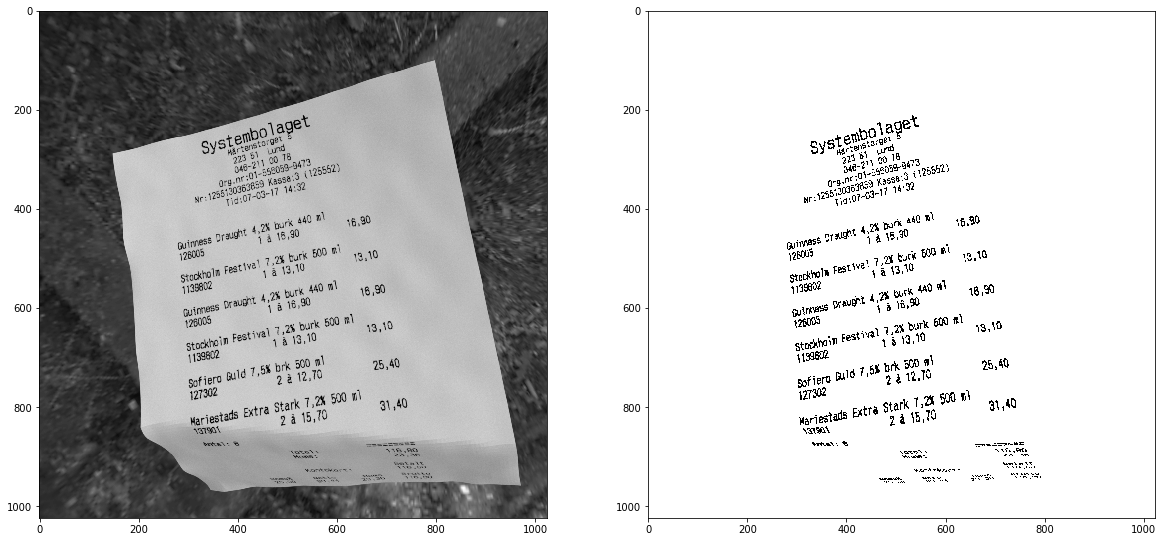

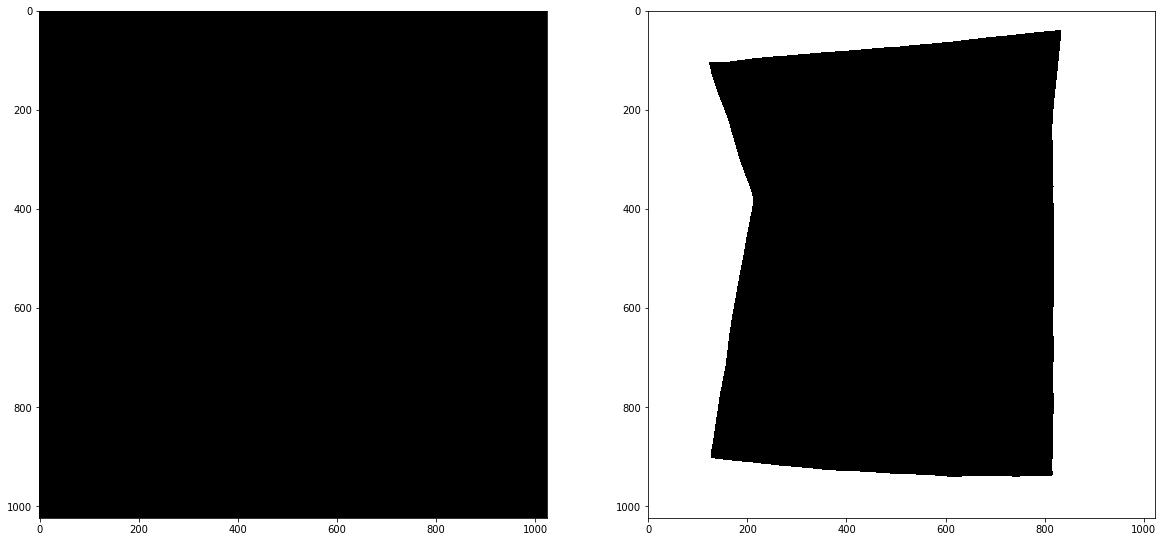

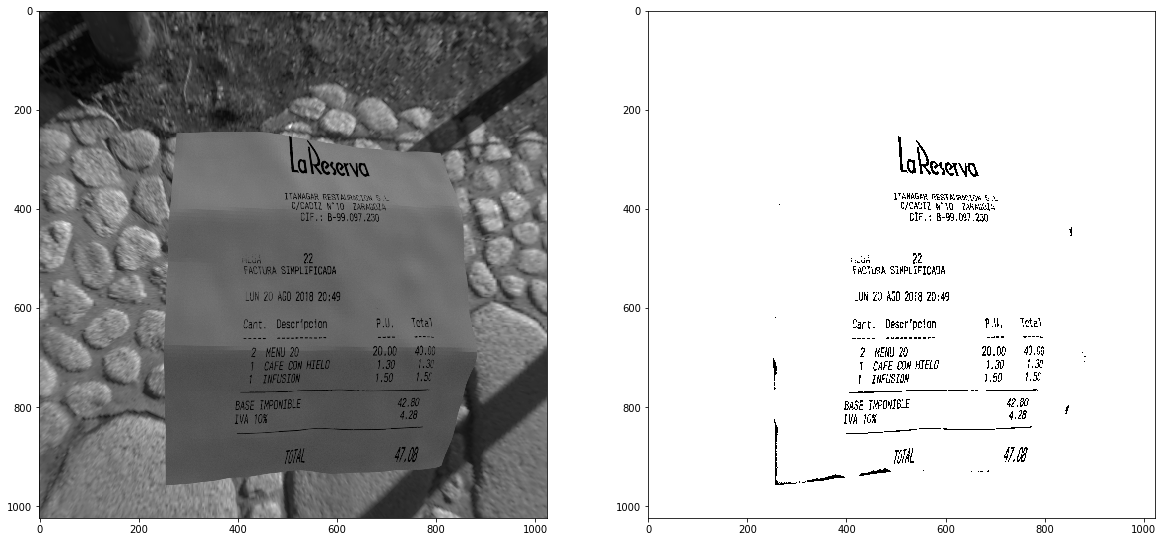

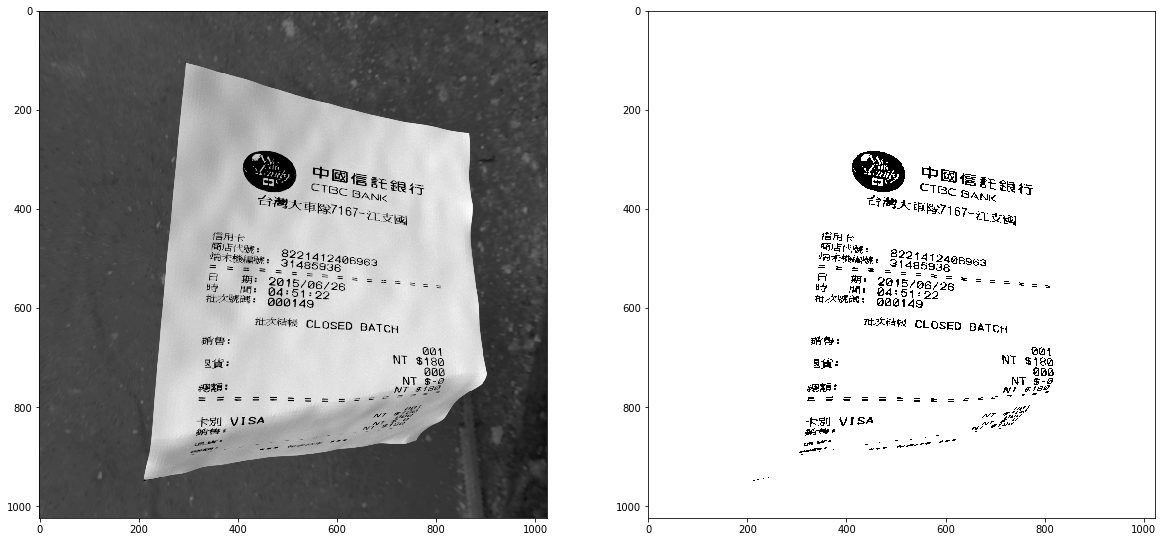

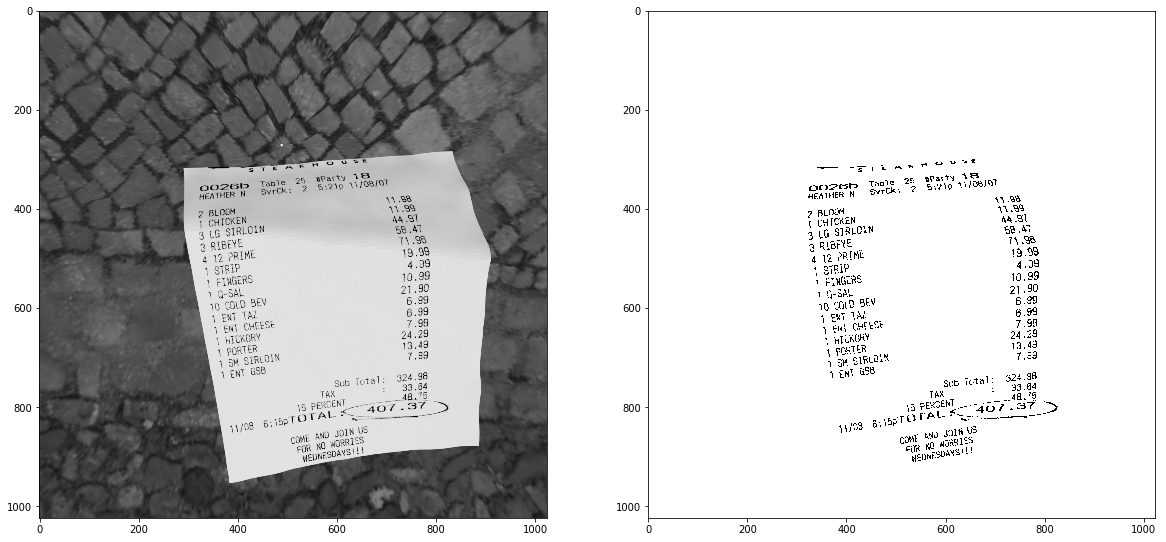

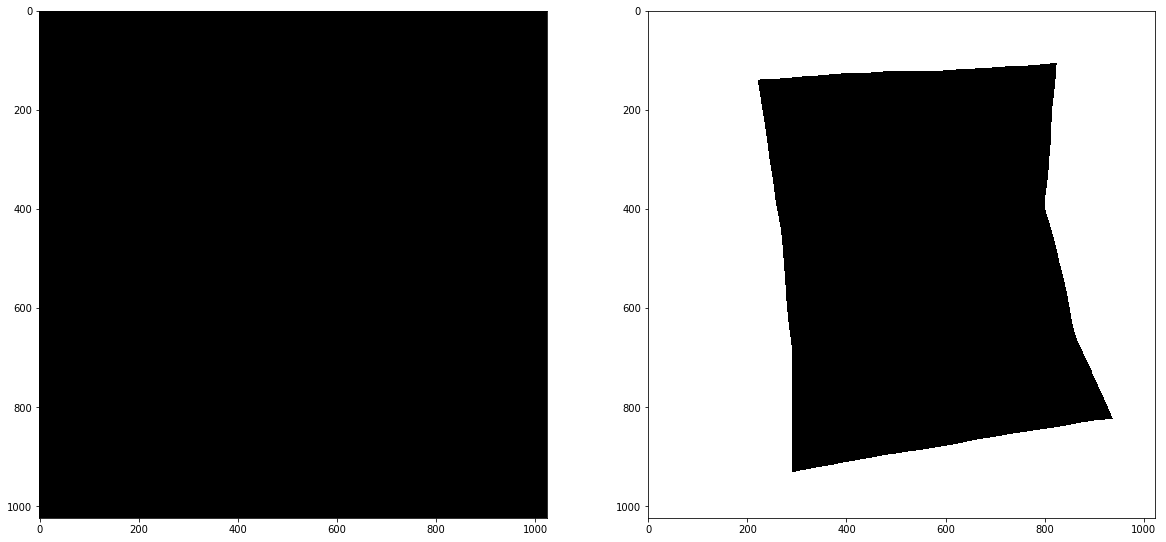

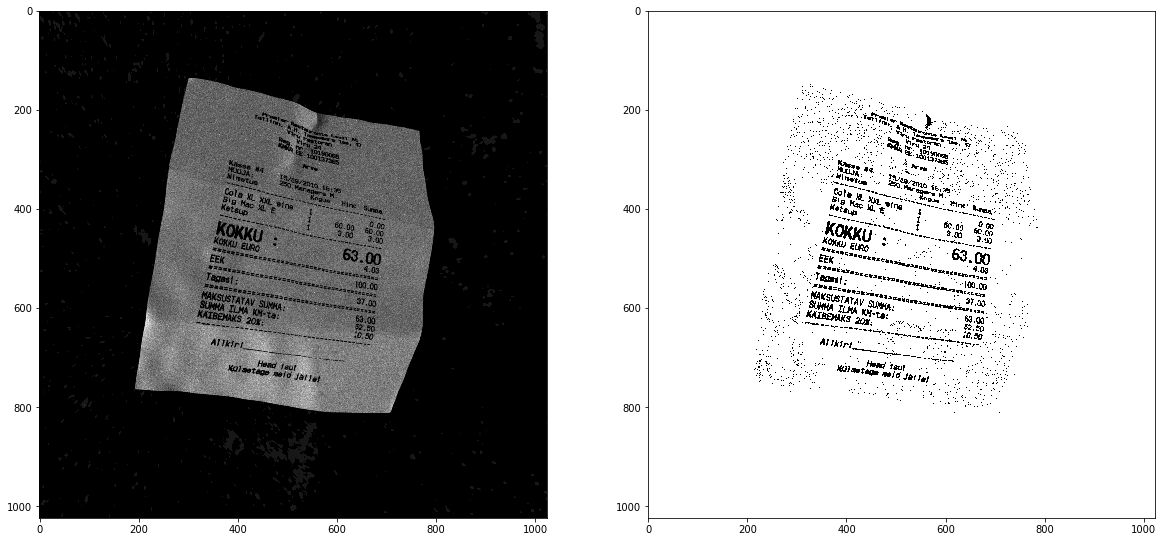

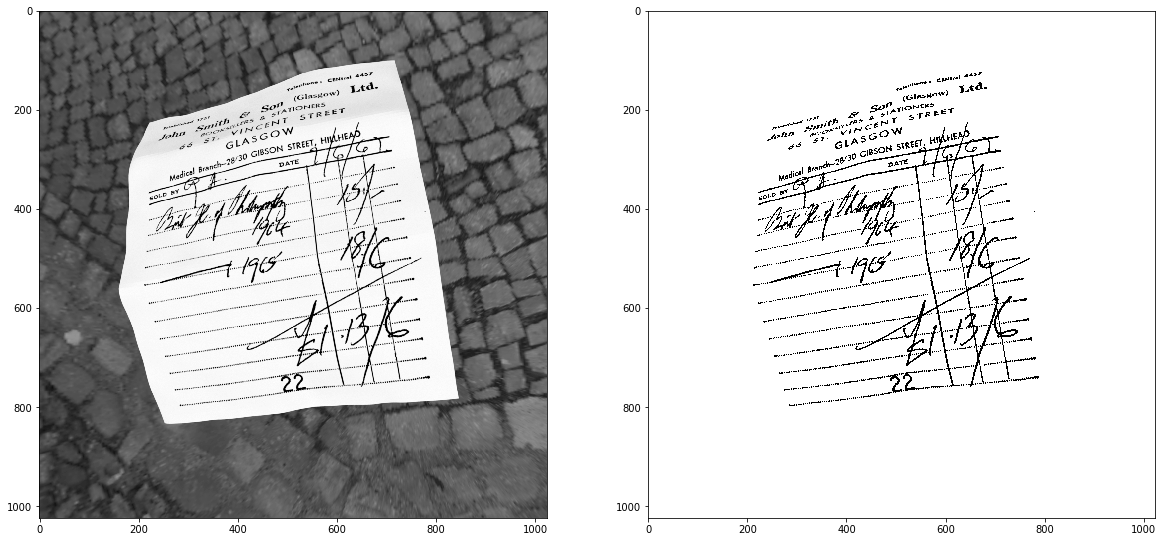

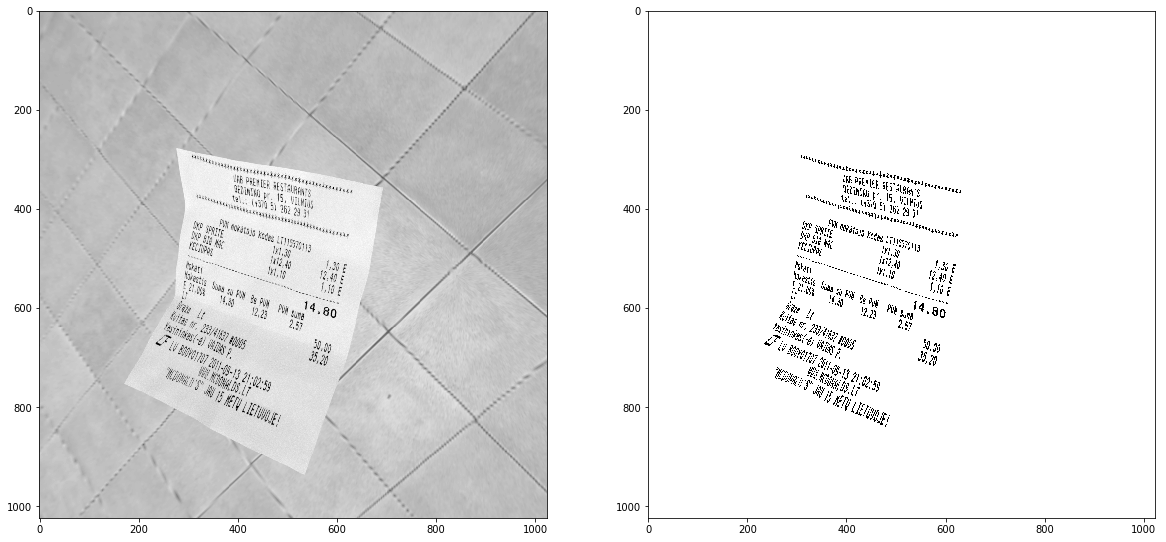

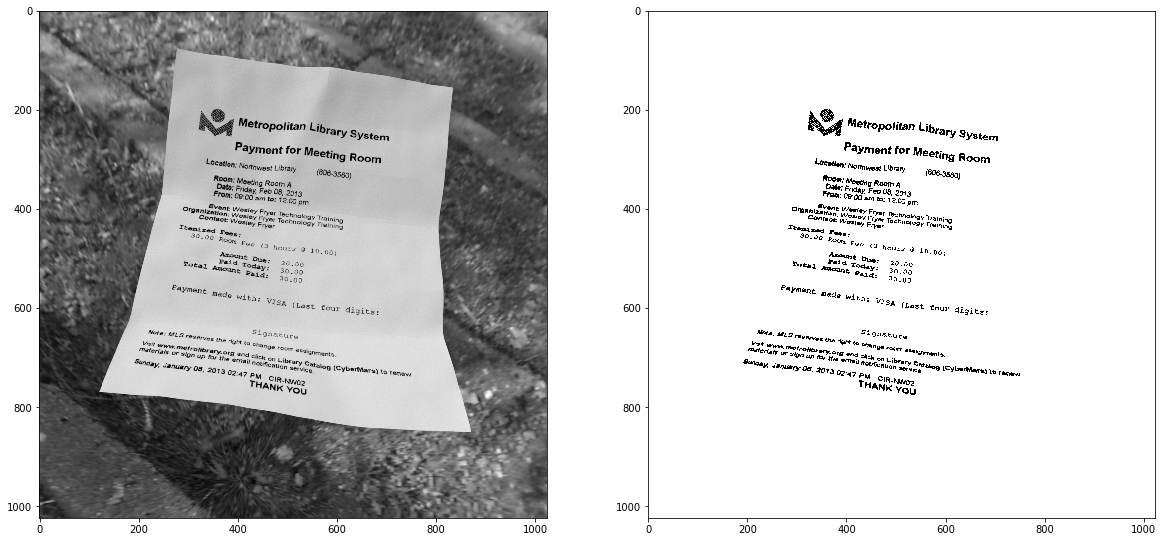

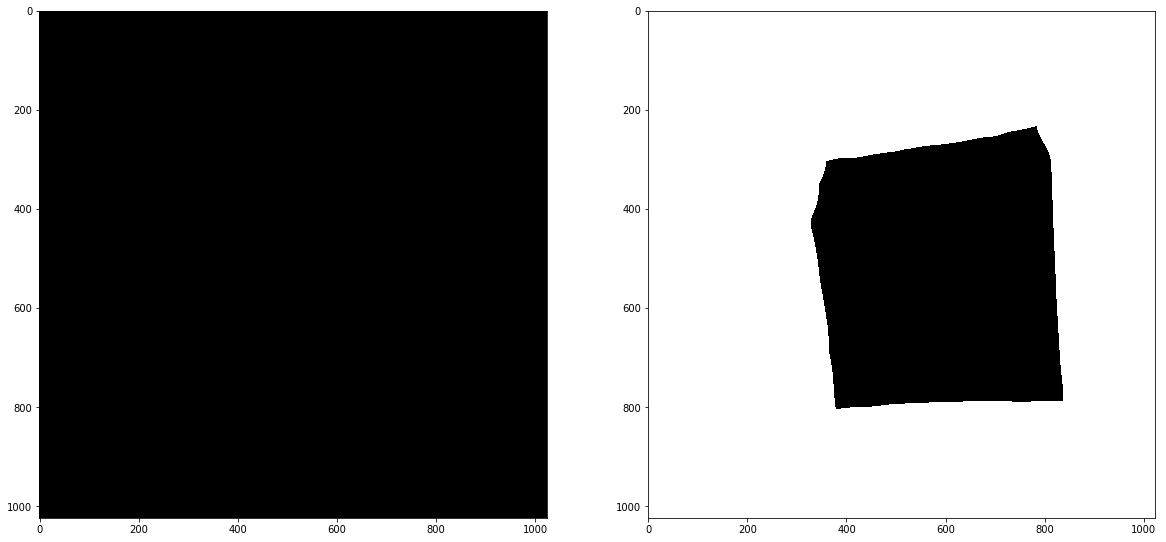

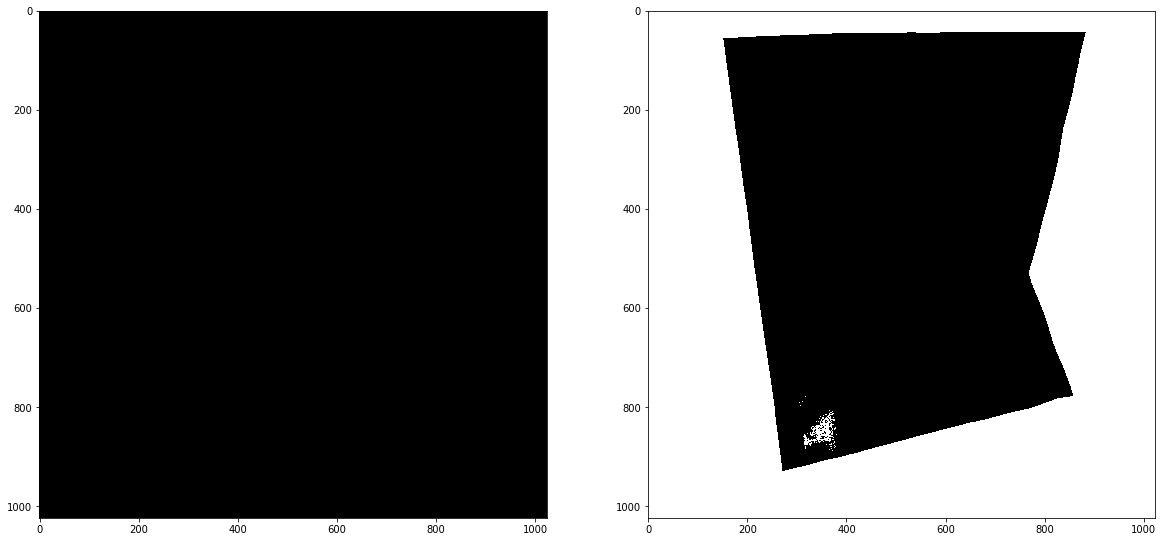

In [22]:
for f in os.listdir('img/10'):
    if f.endswith('.png'):
        img = cv2.imread("img/10/"+f,0) 
        #ret,result = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        window_size = 25

        thresh_sauvola = threshold_sauvola(img, window_size=25)
        result = img>thresh_sauvola

        
        label = cv2.imread("gt/10/"+f,0)
        
        ret,th = cv2.threshold(label,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        for i in range(th.shape[0]):
            for j in range(th.shape[1]):
                if th[i,j] == 0:
                    result[i,j] = 255
        img = cv2.imread("img/10/"+f,0)           
        pyplot.figure(figsize=(20,10))
        pyplot.subplot(121)
        pyplot.imshow(img,cmap='gray')
        pyplot.subplot(122)
        pyplot.imshow(result,cmap='gray')
        pyplot.show()
                    


        
        
                
            
            

In [16]:
from keras.models import Model
from keras.layers import *
from keras import backend as BK
from keras.callbacks import *
import tensorflow as tf
import os
import cv2
import glob
import util
import random
from matplotlib import pyplot

from model import *

import numpy as np
from skimage import data
from skimage.filters import threshold_otsu,threshold_sauvola

In [17]:
def combineimage(output_shape):

        model = DeepOtsu(input_size=output_shape, nb_filters=65,
                                k_size=5, dropout=0,
                                strides=1, every=1)
        model.load_weights("DeepOtsu-datarest_2020.h533-0.06.h5")
        img = cv2.imread("label/10/1_2-50-Ery0001.png",0) 
        rows = img.shape[0]
        cols = img.shape[1]
        if img.shape[0] < output_shape or img.shape[1] < output_shape:
                new_rows = output_shape if img.shape[0] < output_shape else img.shape[0]
                new_cols = output_shape if img.shape[1] < output_shape else img.shape[1]
                img = cv2.resize(img, (new_cols, new_rows), interpolation = cv2.INTER_CUBIC)
        finalImg = np.zeros(img.shape)

        for (x, y, window) in util.sliding_window(img, stepSize=output_shape, windowSize=(output_shape, output_shape)):

                if window.shape[0] != output_shape or window.shape[1] != output_shape:
                    continue
                roi = img[y:(y + output_shape), x:(x + output_shape)].copy()
                roi = roi.reshape(1, output_shape, output_shape, 1)
                roi = roi.astype('float32')/255.
               
                prediction = model.predict(roi)
                finalImg[y:(y + output_shape), x:(x + output_shape)] = prediction[0].reshape(256, output_shape)


        thresh = threshold_otsu(finalImg)
        finalImg = finalImg > thresh

        pyplot.figure(figsize=(20,10))
        pyplot.axis('off')
        pyplot.subplot(111)
        pyplot.imshow(finalImg, cmap='gray')
        pyplot.show()


                
    

/home/li/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


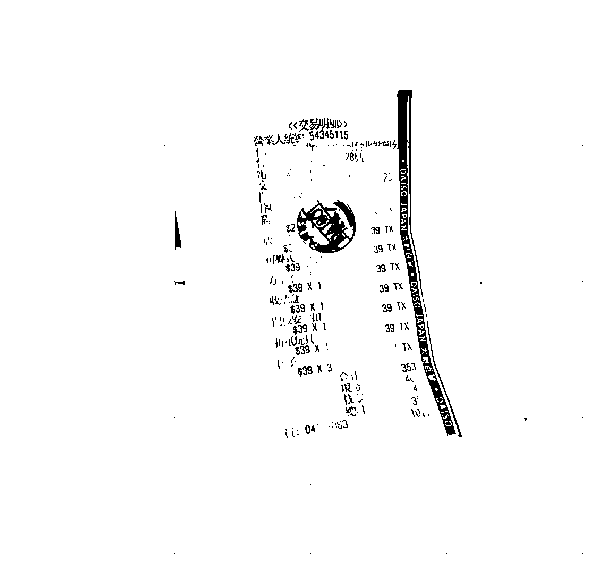

In [18]:
combineimage(256)